In [1]:
from rubin_sim.satellite_constellations import Satellite_avoid_basis_function
from rubin_sim.satellite_constellations import Model_observatory
import rubin_sim.satellite_constellations.sat_utils as sat_utils


import healpy as hp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


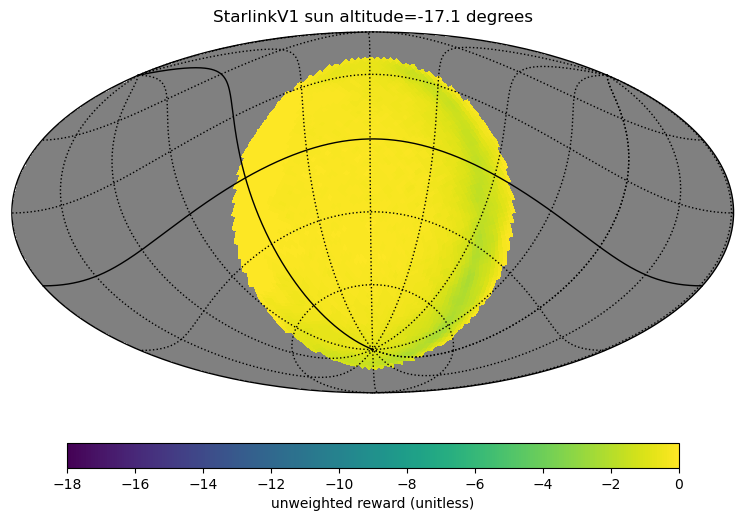

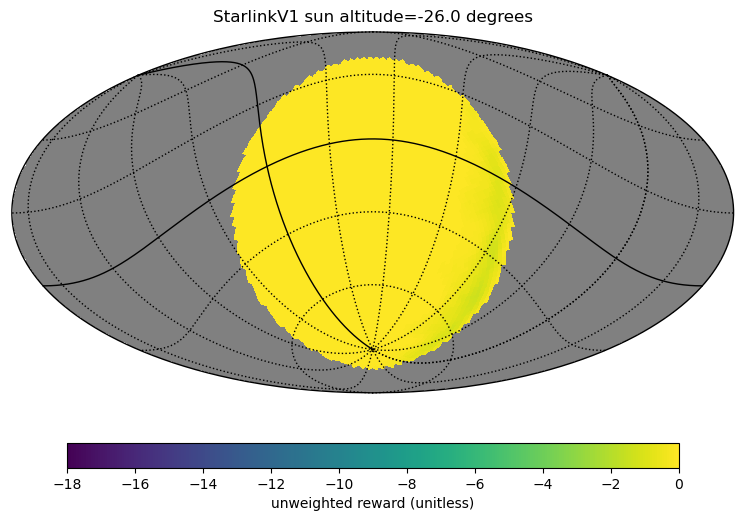

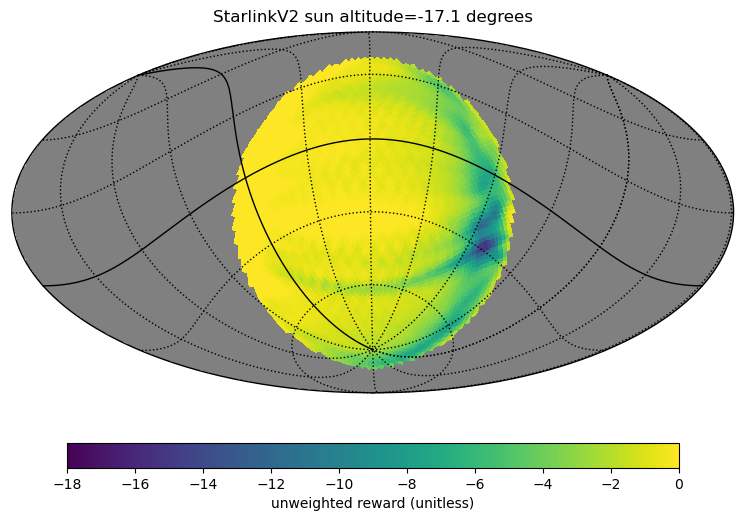

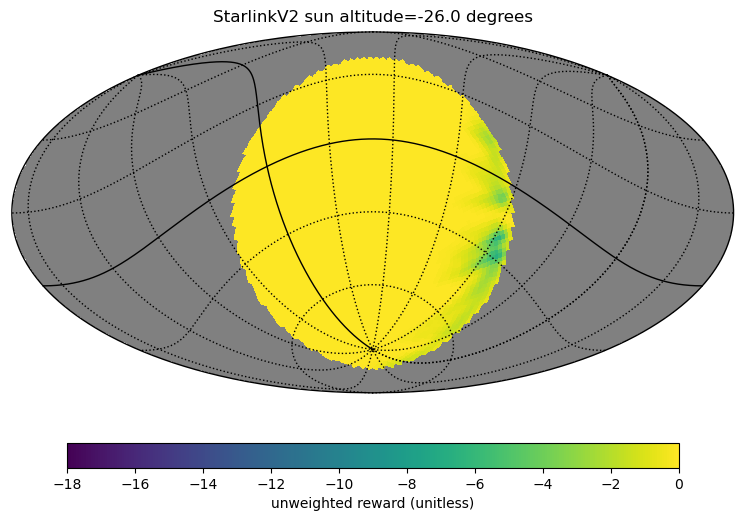

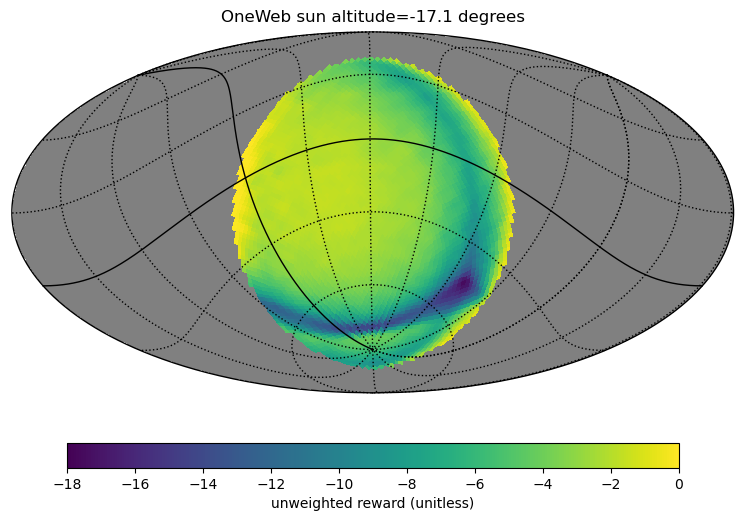

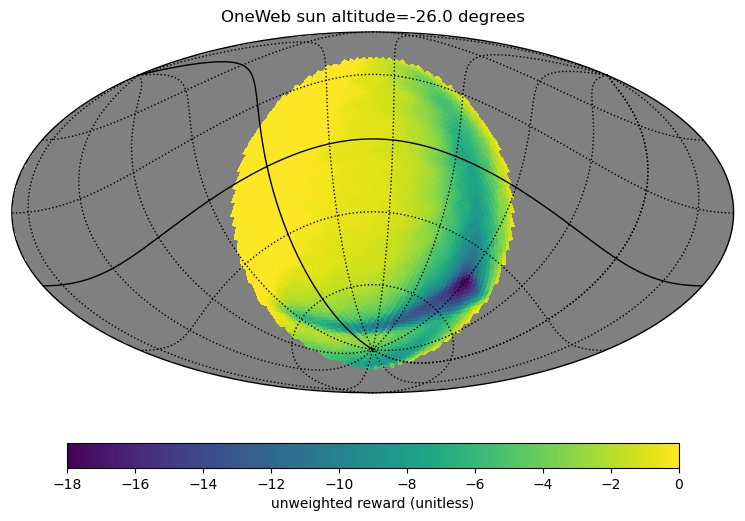

In [2]:

titles = {'starlink_tles_v1': 'StarlinkV1',
          'starlink_tles_v2': 'StarlinkV2',
          'oneweb_tles': 'OneWeb'}
# Takes a freaking long time to run, because the observatory is predicting things for a full night I think.
for constellation_name in ['starlink_tles_v1', 'starlink_tles_v2', 'oneweb_tles']:

    func = getattr(sat_utils, constellation_name)
    tles = func()
    constellation = sat_utils.Constellation(tles)
    
    mo = Model_observatory(constellation=constellation)
    for tstep in [0, .03]:
        mo.mjd += tstep
        conditions = mo.return_conditions()
        bf = Satellite_avoid_basis_function()
        sat_map = bf(conditions)
        
        below = np.where(conditions.alt < np.radians(20))[0]
        sat_map[below] = np.nan

        title = titles[constellation_name]
        title += ' sun altitude=%.1f degrees' % np.degrees(conditions.sunAlt)
        hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, cbar=False, min=-18, max=0)
        # healpy failing on negative colorbar for some reason. That's a new one.
        ax = plt.gca()
        im = ax.get_images()[0]
        cb = plt.colorbar(im,
                            shrink=0.75,
                            aspect=25,
                            pad=0.1,
                            orientation="horizontal",
                            extendrect=True)
        cb.set_label('unweighted reward (unitless)')
        hp.graticule()
        plt.savefig(constellation_name+'_%.2f_basisfunc.pdf' % tstep)
        

/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2662: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale = 1.0 / inw
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2664: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx = np.array([[x_scale, 0.0    , (-inl*x_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


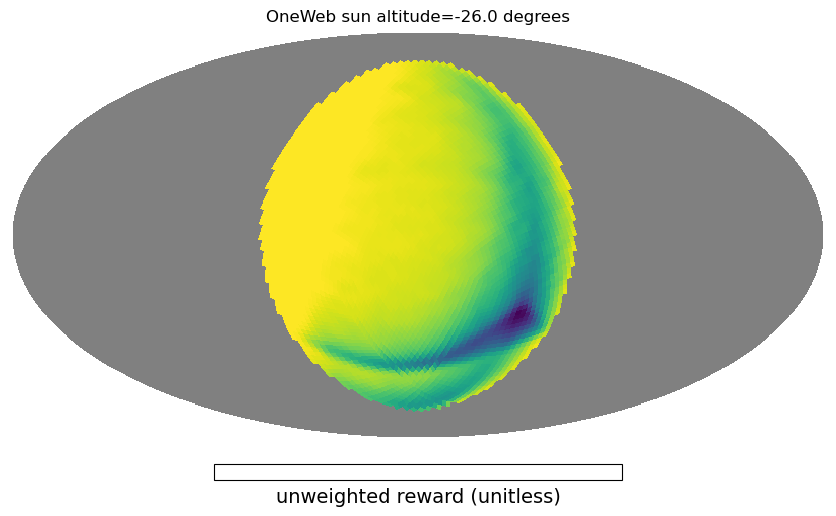

In [3]:
hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, unit='unweighted reward (unitless)', min=-18, max=0)

In [4]:
sat_map = bf(conditions)
below = np.where(conditions.alt < np.radians(20))[0]
sat_map[below] = np.nan

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


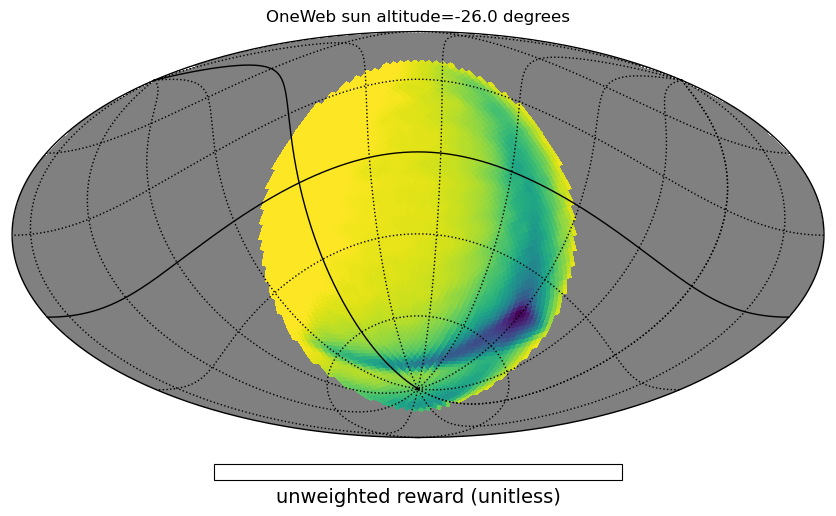

In [5]:
hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, unit='unweighted reward (unitless)', min=-18, max=0)
hp.graticule()

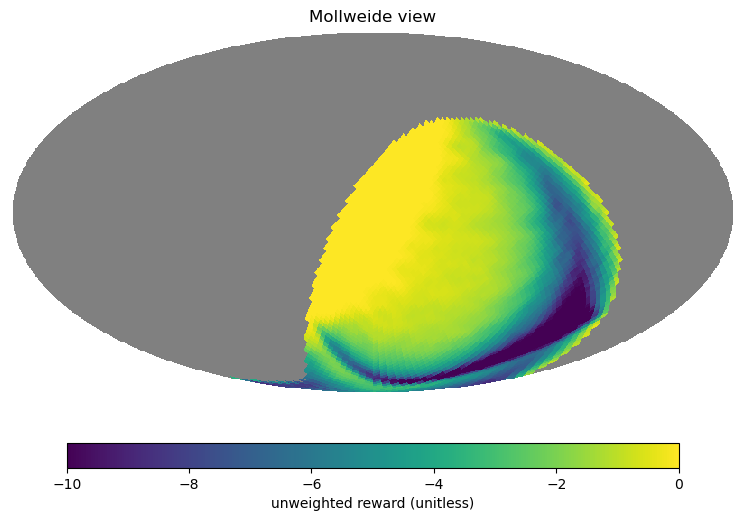

In [6]:
hp.mollview(sat_map, cbar=False, min=-10)
ax = plt.gca()
im = ax.get_images()[0]
cb = plt.colorbar(im,
                    shrink=0.75,
                    aspect=25,
                    pad=0.1,
                    orientation="horizontal",
                    extendrect=True)
cb.set_label('unweighted reward (unitless)')
#fig.colorbar(ax)
#cbar = fig.colorbar(ax, ticks=[-1, 0, 1], orientation='horizontal')

In [7]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable=None, cax=None, ax=None, **kw)
    Add a colorbar to a plot.
    
    Parameters
    ----------
    mappable
        The `matplotlib.cm.ScalarMappable` (i.e., `~matplotlib.image.AxesImage`,
        `~matplotlib.contour.ContourSet`, etc.) described by this colorbar.
        This argument is mandatory for the `.Figure.colorbar` method but optional
        for the `.pyplot.colorbar` function, which sets the default to the current
        image.
    
        Note that one can create a `.ScalarMappable` "on-the-fly" to generate
        colorbars not attached to a previously drawn artist, e.g. ::
    
            fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    
    cax : `~matplotlib.axes.Axes`, optional
        Axes into which the colorbar will be drawn.
    
    ax : `~matplotlib.axes.Axes`, list of Axes, optional
        One or more parent axes from which space for a new colorbar axes will be
      